In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day (1).csv
Saving hour.csv to hour (1).csv


In [3]:
df1=pd.read_csv("day.csv")
df2=pd.read_csv("hour.csv")

In [4]:
print("Day Dataset:")
print(df1.head())
print("\nHour Dataset:")
print(df2.head())

Day Dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Hour Dataset

In [5]:
def clean_data(df):

    df = df.drop_duplicates()

    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("[^a-z0-9_]", "", regex=True)
    )

    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].str.lower().str.strip()

    if "dteday" in df.columns:
        df["dteday"] = pd.to_datetime(df["dteday"], errors="coerce")

    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="ignore")

    for col in df.select_dtypes(include=np.number).columns:
        df[col] = df[col].fillna(df[col].mean())

    for col in df.select_dtypes(include='object').columns:
        if df[col].mode().size > 0:
            df[col] = df[col].fillna(df[col].mode()[0])

    return df

clean_day = clean_data(df1)
clean_hour = clean_data(df2)

clean_day.to_csv("cleaned_day.csv", index=False)
clean_hour.to_csv("cleaned_hour.csv", index=False)


/tmp/ipython-input-4003521744.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/tmp/ipython-input-4003521744.py:22: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-4003521744.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/tmp/ipython-input-4003521744.py:22: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


In [6]:
clean_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1293840000000000000,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1293926400000000000,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1294012800000000000,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1294099200000000000,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1294185600000000000,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
clean_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1293840000000000000,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1293840000000000000,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1293840000000000000,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1293840000000000000,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1293840000000000000,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
def eda_summary(df, name="dataset"):
    print("="*50)
    print(f"📌 EDA SUMMARY FOR: {name.upper()}")
    print("="*50)

    print("\nShape:", df.shape)
    print("\nColumns:", df.columns.tolist())

    print("\nData Types:")
    print(df.dtypes)

    print("\nMissing Values:")
    print(df.isnull().sum())

    print("\nDuplicate Rows:", df.duplicated().sum())

    print("\nStatistical Summary (Numeric):")
    display(df.describe())

    print("\nStatistical Summary (Categorical):")
    if not df.select_dtypes(include='object').empty:
        display(df.describe(include="object"))
    else:
        print("No categorical columns found for statistical summary.")

eda_summary(clean_day, "cleaned_day.csv")
eda_summary(clean_hour, "cleaned_hour.csv")

📌 EDA SUMMARY FOR: CLEANED_DAY.CSV

Shape: (731, 16)

Columns: ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Data Types:
instant         int64
dteday          int64
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicate Rows: 0

Statistical Summary (Numeric):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,7.310000e+02,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,1.325376e+18,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.824473e+16,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.293840e+18,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,1.309608e+18,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.325376e+18,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.341144e+18,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.356912e+18,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



Statistical Summary (Categorical):
No categorical columns found for statistical summary.
📌 EDA SUMMARY FOR: CLEANED_HOUR.CSV

Shape: (17379, 17)

Columns: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Data Types:
instant         int64
dteday          int64
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,1.737900e+04,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,1.325477e+18,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.815023e+16,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.293840e+18,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,1.309738e+18,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,1.325462e+18,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,1.341187e+18,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.356912e+18,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000



Statistical Summary (Categorical):
No categorical columns found for statistical summary.


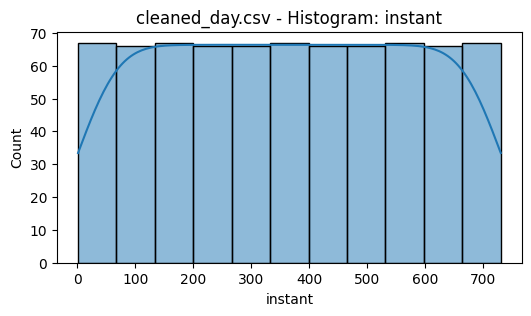

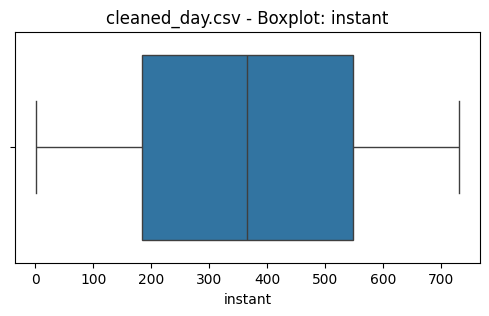

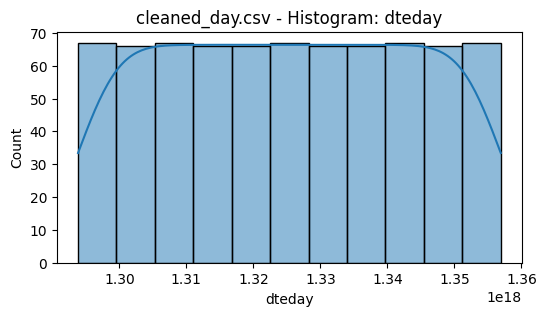

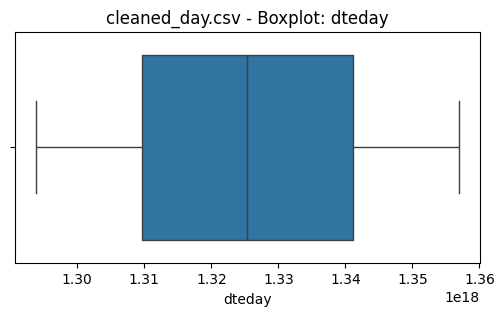

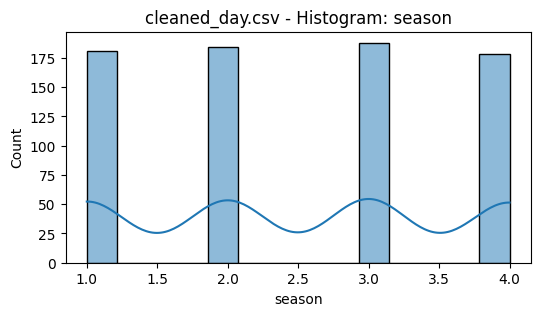

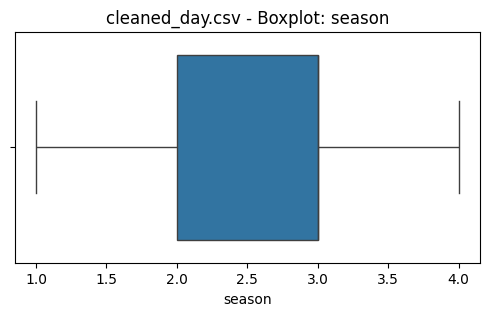

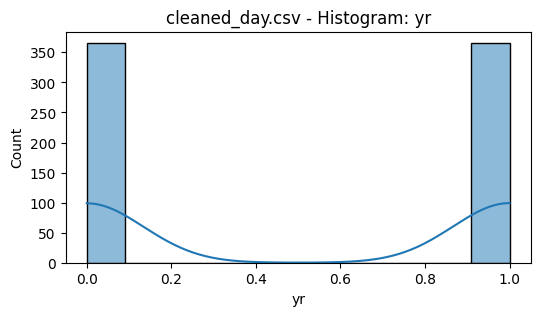

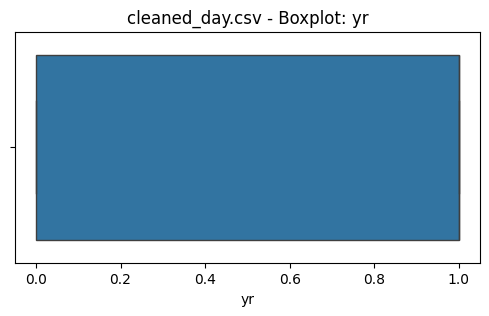

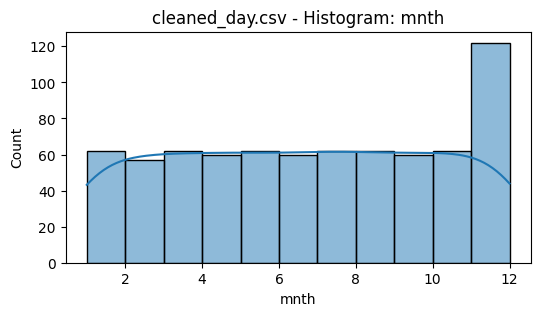

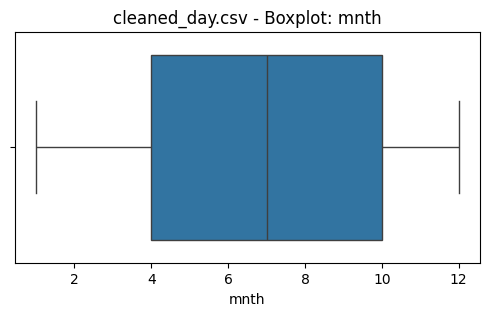

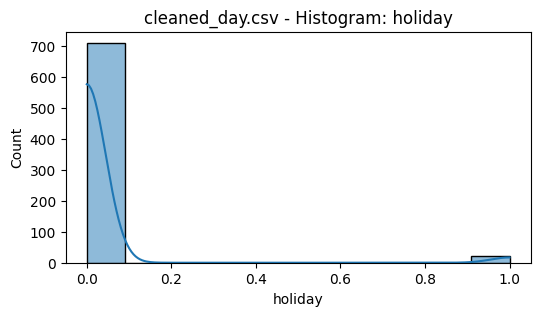

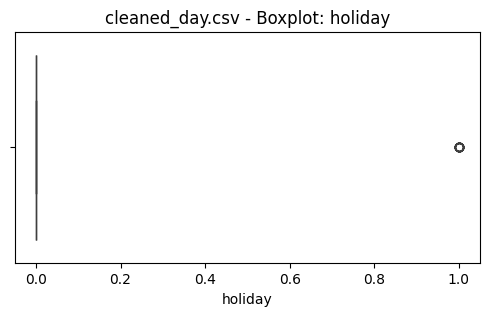

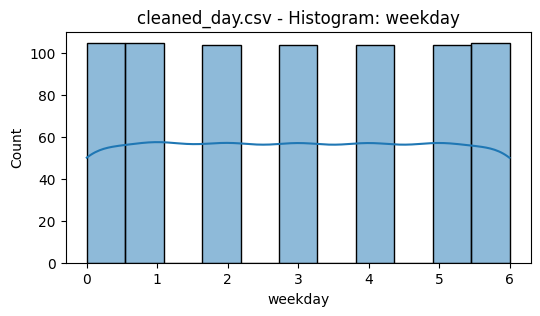

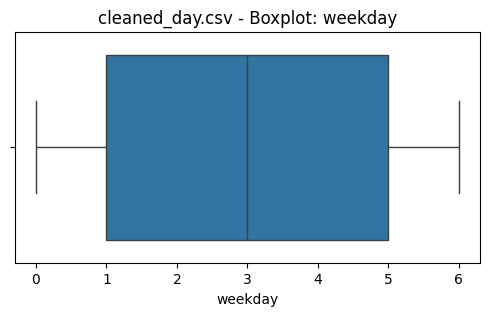

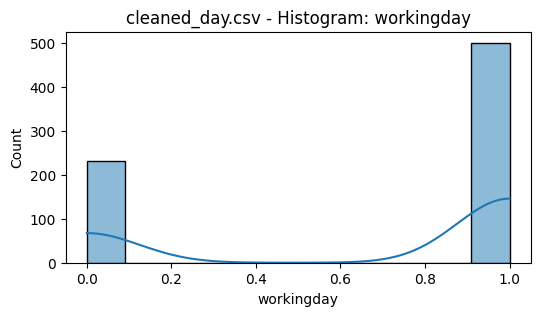

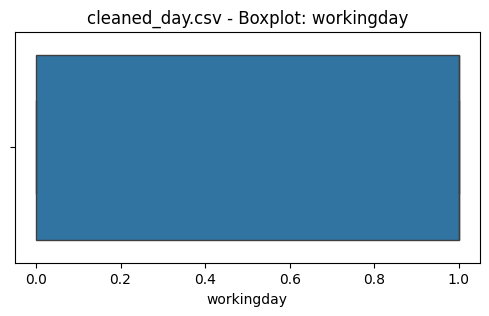

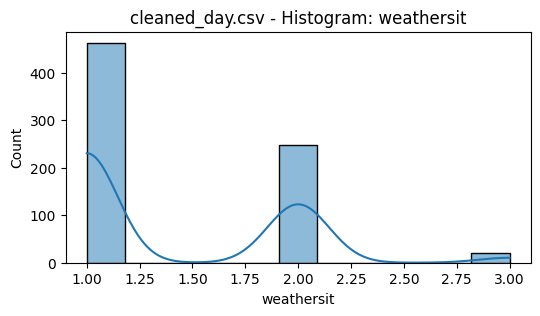

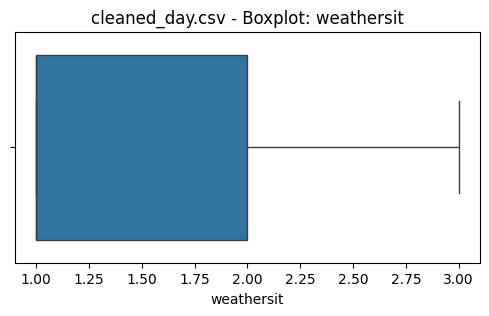

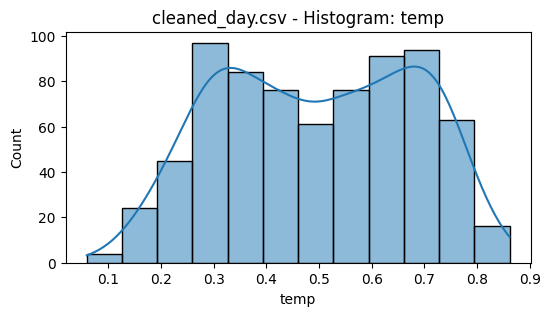

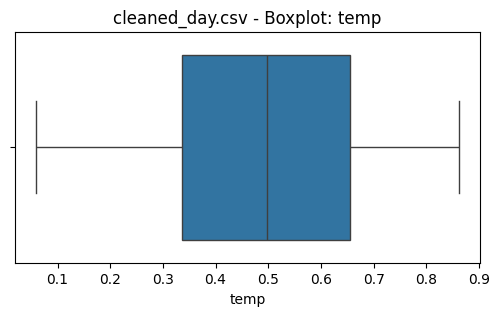

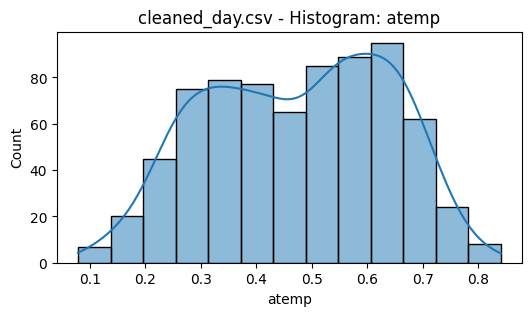

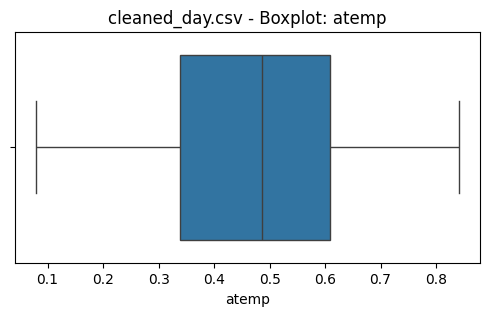

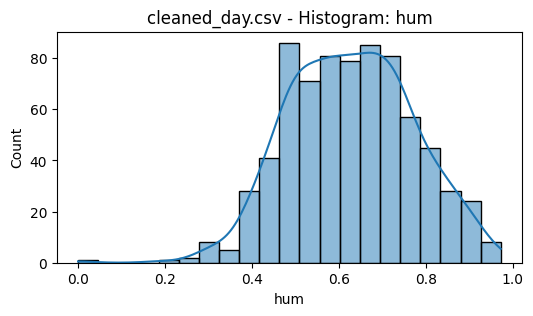

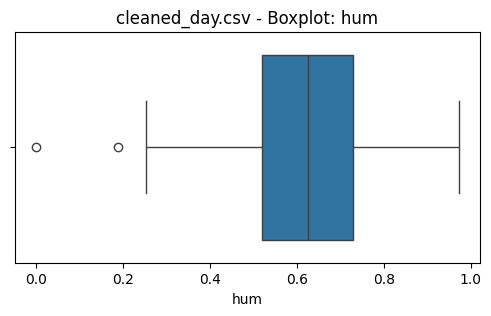

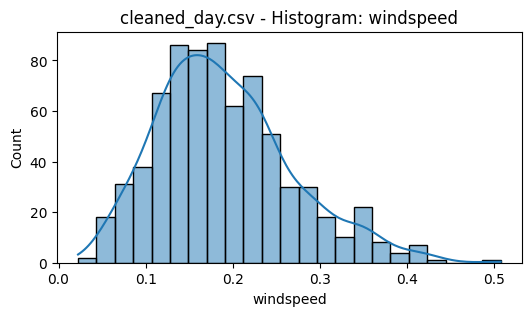

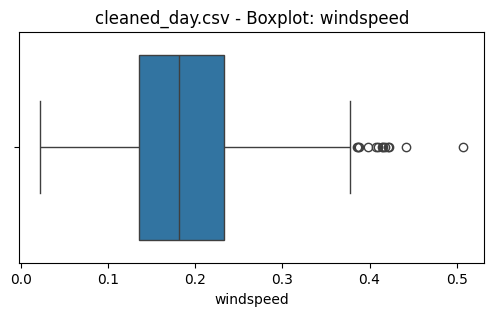

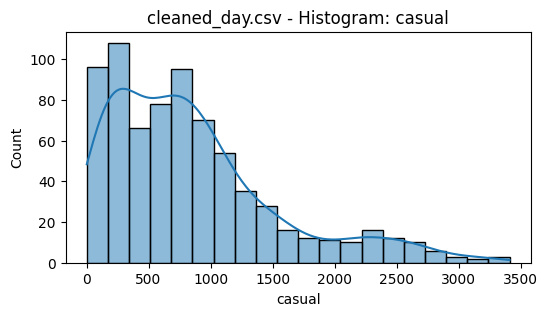

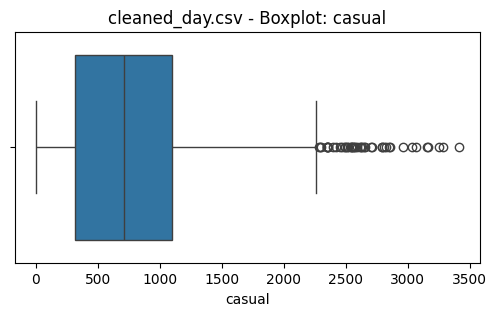

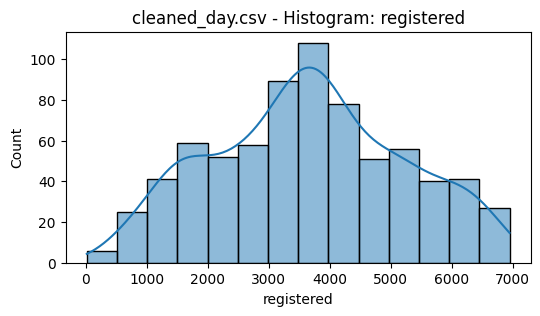

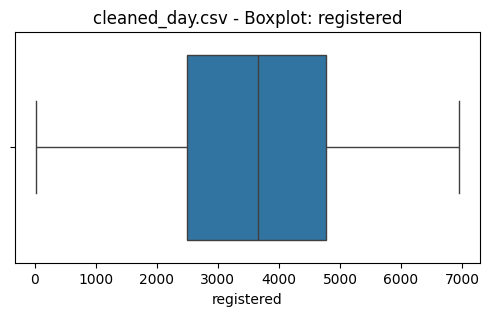

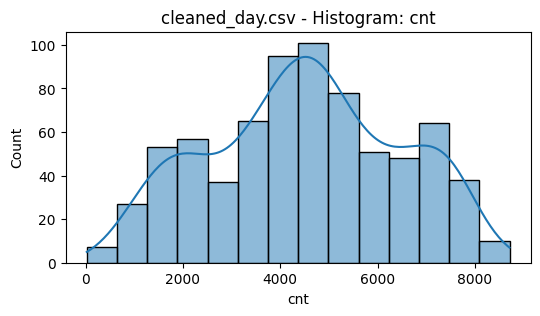

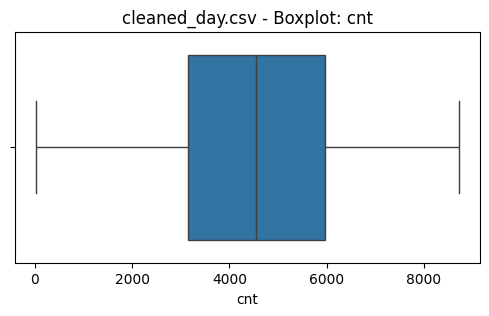

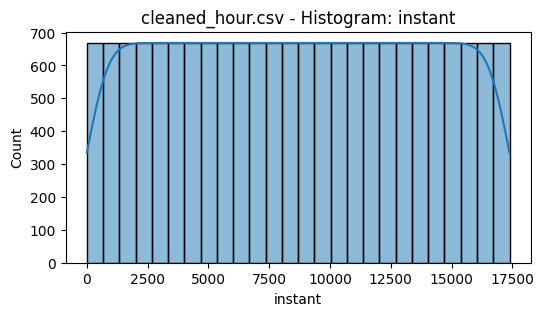

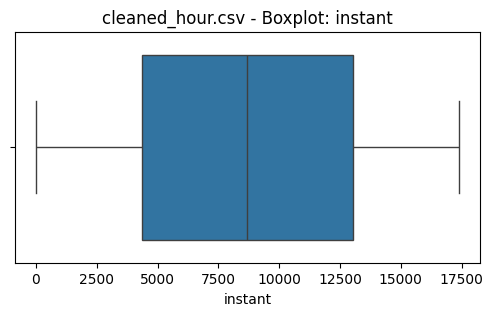

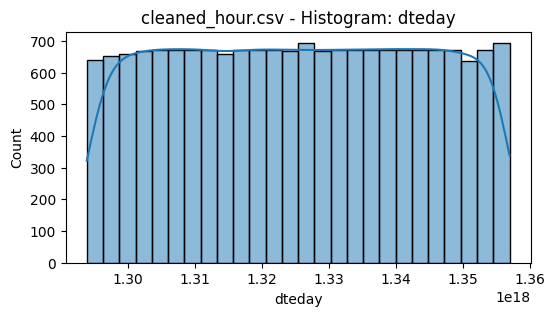

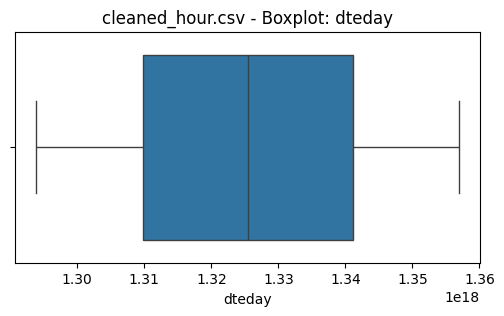

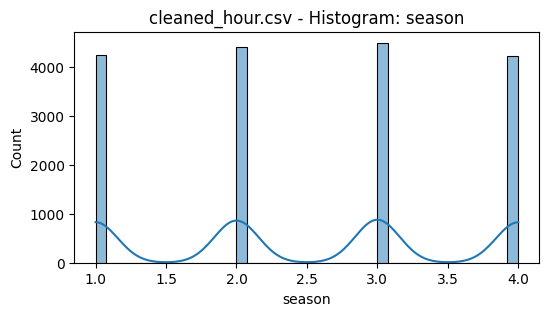

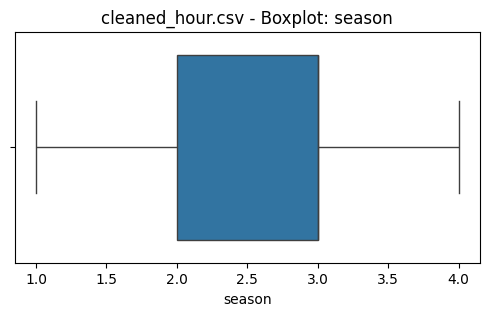

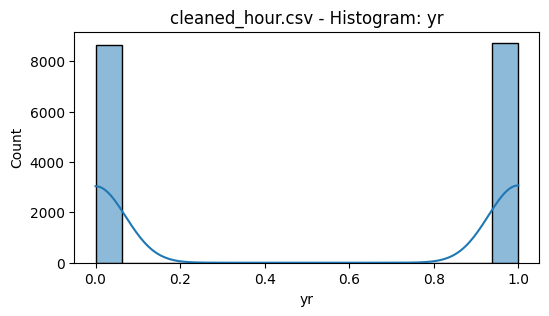

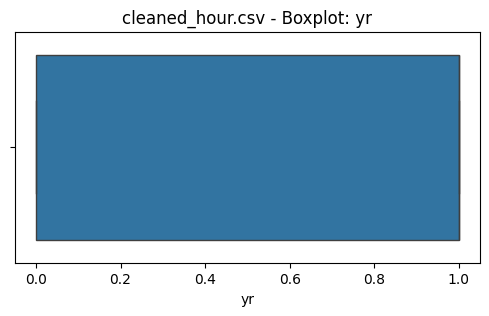

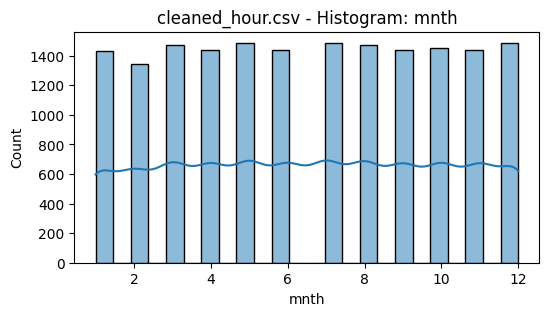

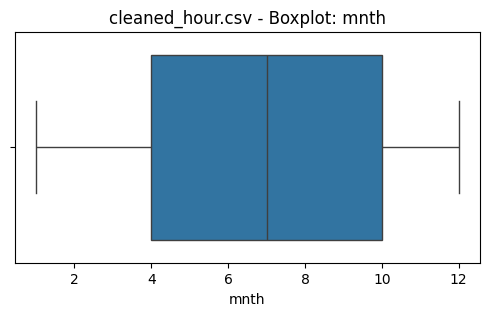

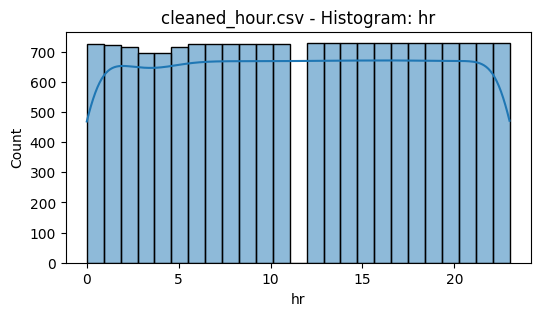

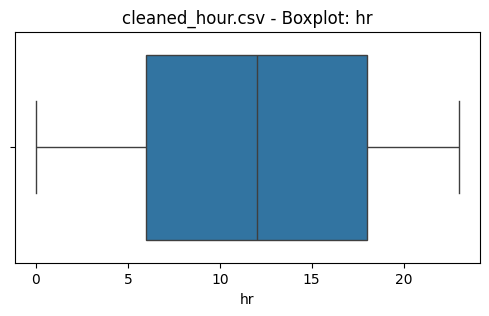

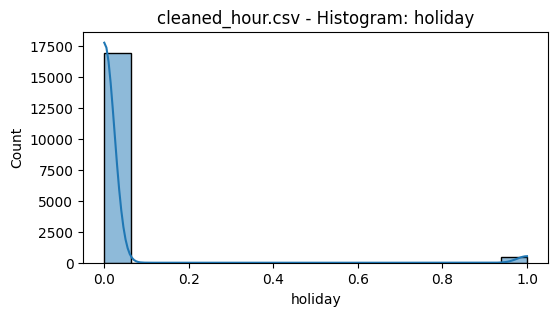

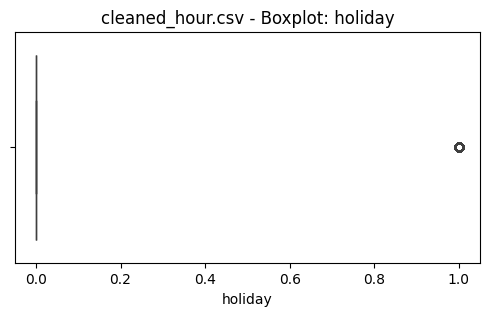

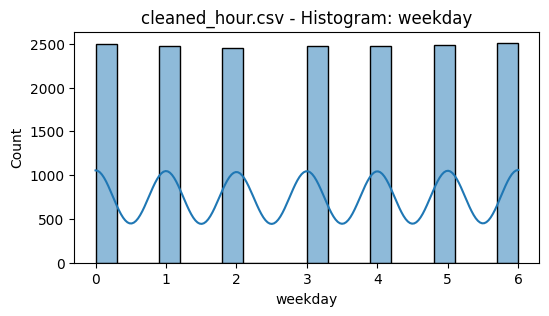

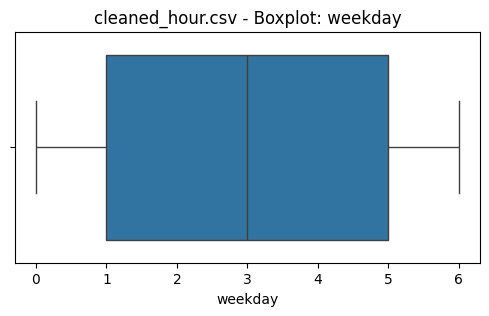

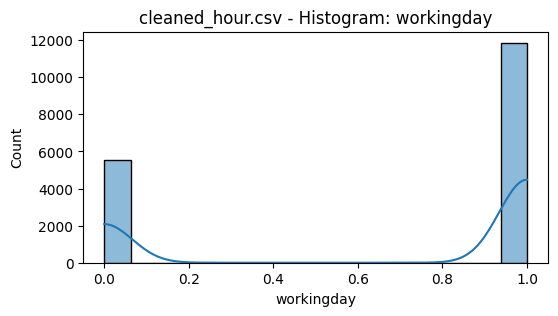

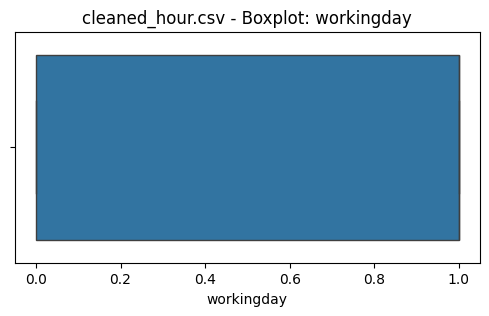

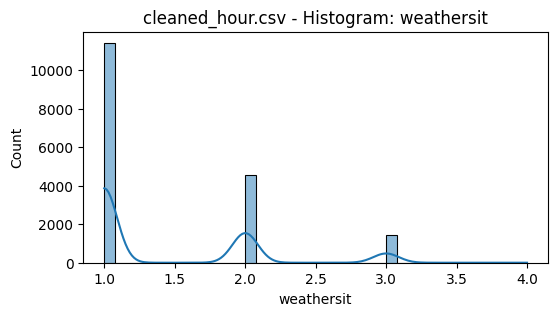

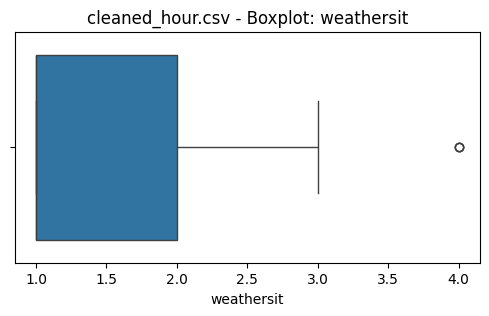

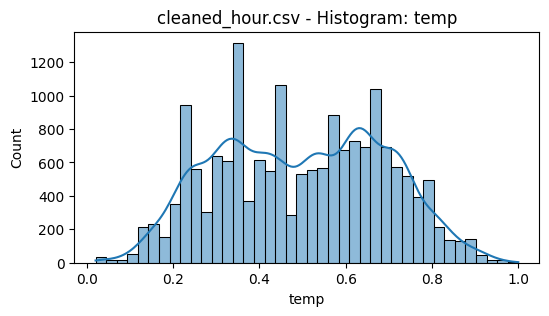

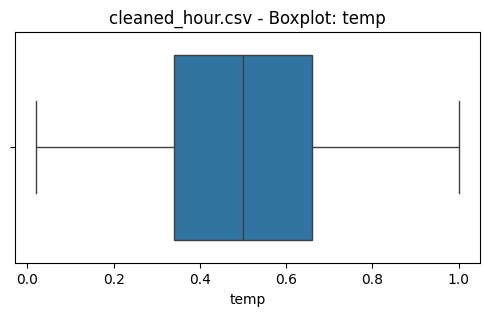

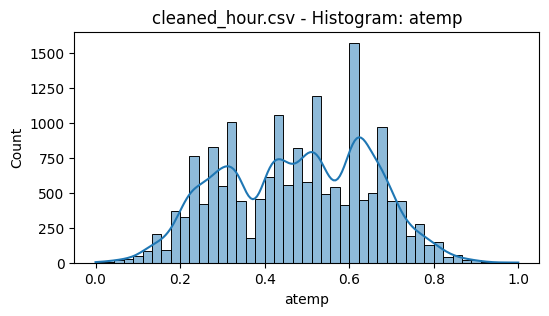

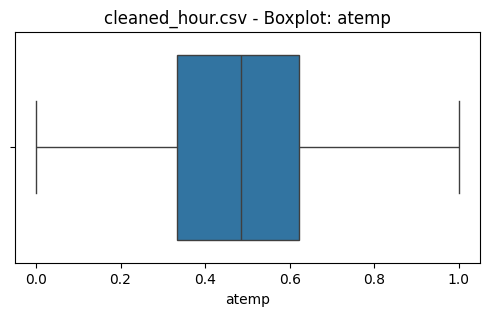

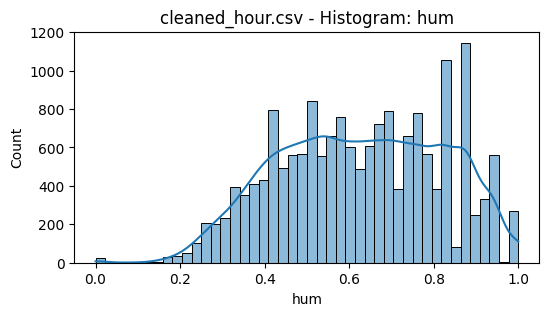

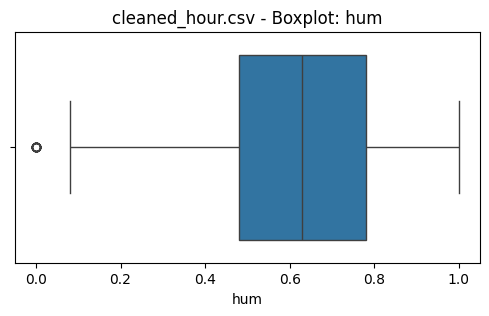

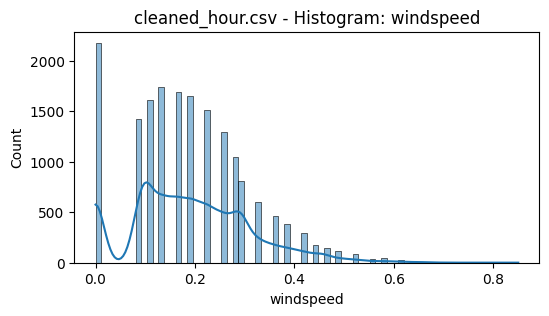

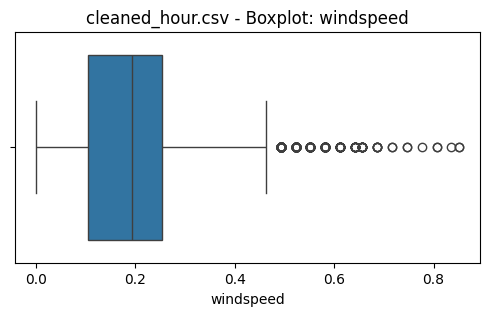

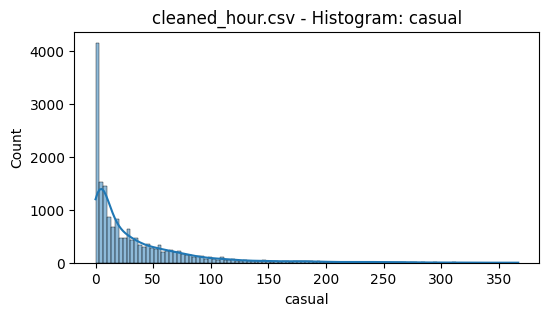

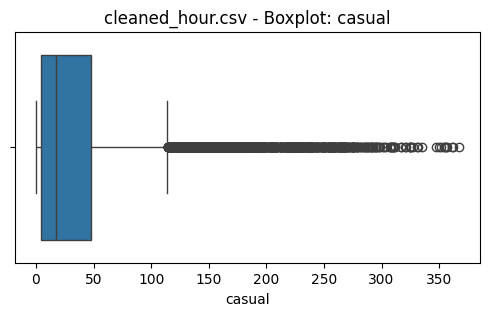

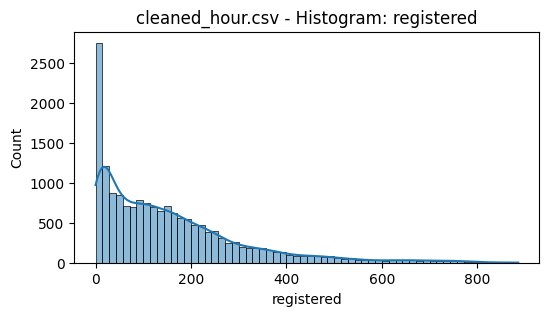

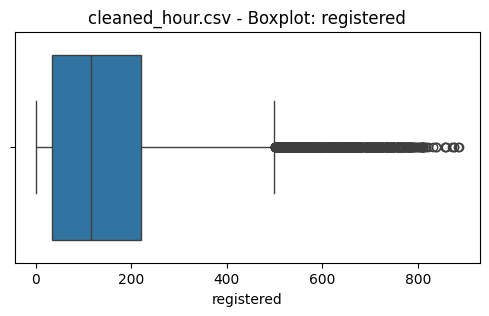

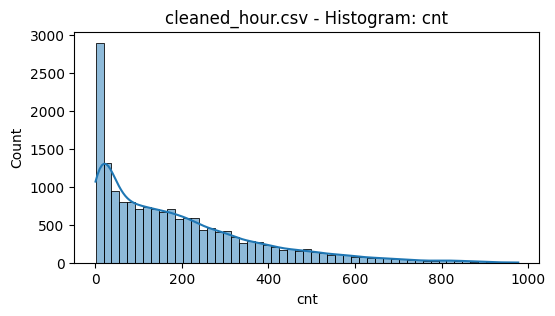

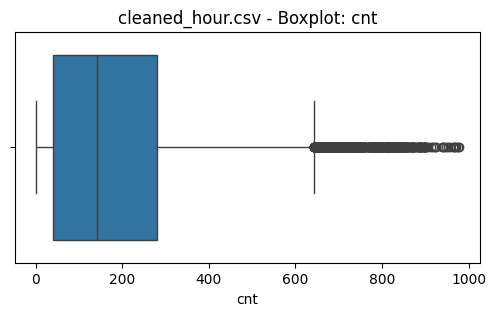

In [9]:
def plot_numeric(df, name):
    numeric_cols = df.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        plt.figure(figsize=(6, 3))
        sns.histplot(df[col], kde=True)
        plt.title(f"{name} - Histogram: {col}")
        plt.show()
        plt.close()

        plt.figure(figsize=(6, 3))
        sns.boxplot(x=df[col])
        plt.title(f"{name} - Boxplot: {col}")
        plt.show()
        plt.close()

plot_numeric(clean_day, "cleaned_day.csv")
plot_numeric(clean_hour, "cleaned_hour.csv")


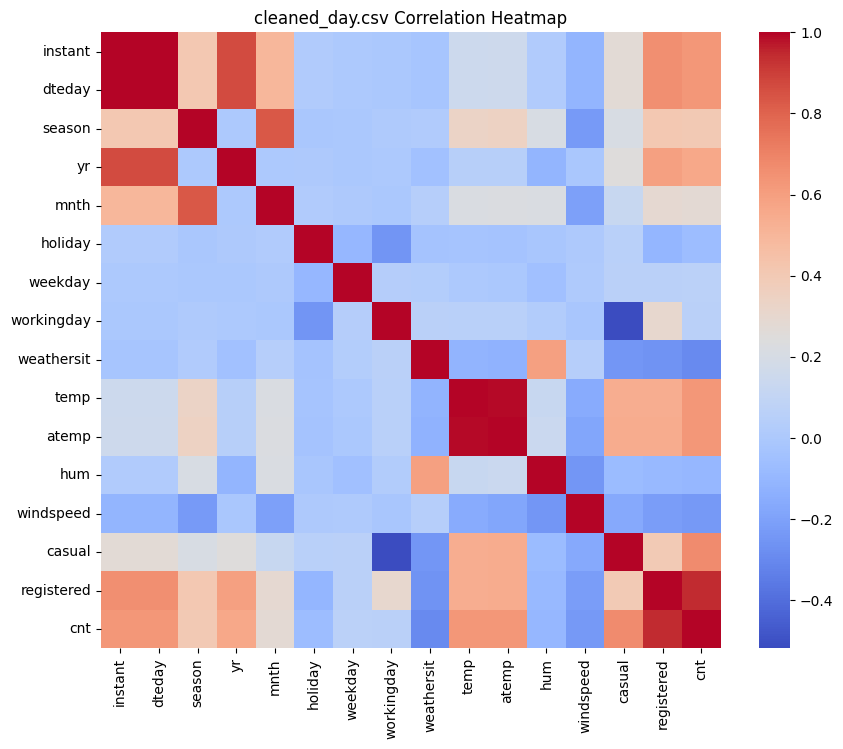

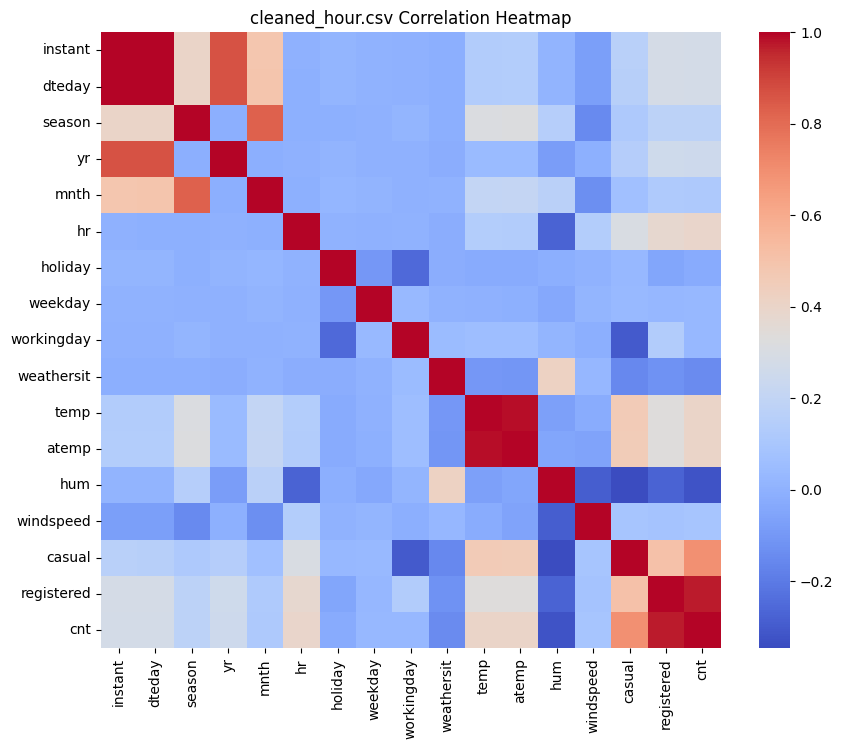

In [10]:
def plot_correlation(df, name):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
    plt.title(f"{name} Correlation Heatmap")
    plt.show()
    plt.close()

plot_correlation(clean_day, "cleaned_day.csv")
plot_correlation(clean_hour, "cleaned_hour.csv")
